In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import math
import numpy
from scipy.fftpack import dct 
import sys
import os
import scipy.io.wavfile as wav
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import librosa.display


In [ ]:
a=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/train/T_1001519.npy')

In [ ]:
b=np.squeeze(a,axis=2).T

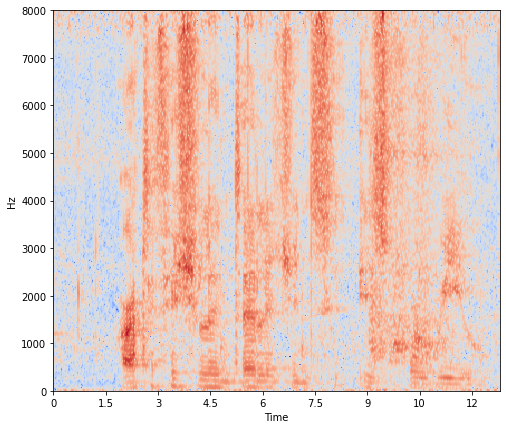

In [ ]:
plt.figure(figsize=(8, 7))
librosa.display.specshow(b, sr=16000,y_axis='linear', fmax=8000, x_axis='time')

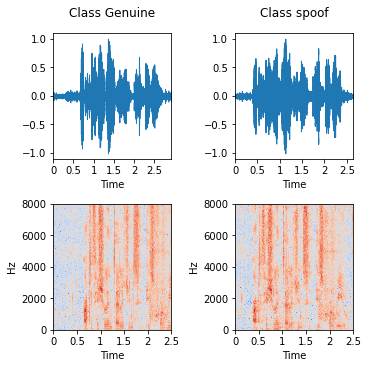

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(5,5),constrained_layout=True)
axes[0, 0].set_title("Class Genuine", y=1.08)
data1, sr1 = librosa.load(f"/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ASV_SPOOF/Asvspoof2017_v2/ASVspoof2017_V2/train/" + 'T_1000011.wav')
_ = librosa.display.waveplot(data1, sr=sr1, ax=axes[0, 0])
axes[0, 1].set_title("Class spoof", y=1.08)
data2, sr2 = librosa.load(f"/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ASV_SPOOF/Asvspoof2017_v2/ASVspoof2017_V2/train/" + 'T_1001519.wav')
_ = librosa.display.waveplot(data2, sr=sr2, ax=axes[0, 1])
a=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/train/T_1000011.npy')
b=np.squeeze(a,axis=2).T
_ = librosa.display.specshow(b, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=axes[1, 0])
c=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/train/T_1001519.npy')
d=np.squeeze(c,axis=2).T
_ = librosa.display.specshow(d, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=axes[1, 1])


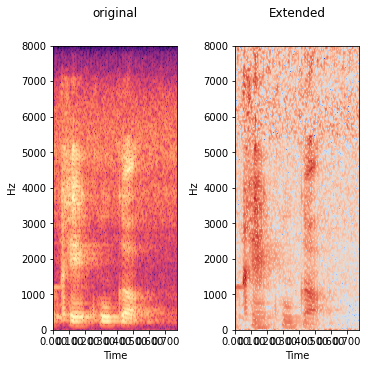

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1, 2, figsize=(5,5),constrained_layout=True)
ax1.set_title("original", y=1.08)
rate,sig = wav.read('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ASV_SPOOF/Asvspoof2017_v2/ASVspoof2017_V2/train/T_1002479.wav')
sig = pre_emphasis(sig)
frames = audio2frame(sig,400,100,np.blackman)
logPowSpec = log_spectrum_power(frames,800,norm=1)[:,:-1].T
_ = librosa.display.specshow(logPowSpec, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=ax1)
ax2.set_title("Extended", y=1.08)
c=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/train/T_1002479.npy')
d=np.squeeze(a,axis=2).T
_ = librosa.display.specshow(d, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=ax2)

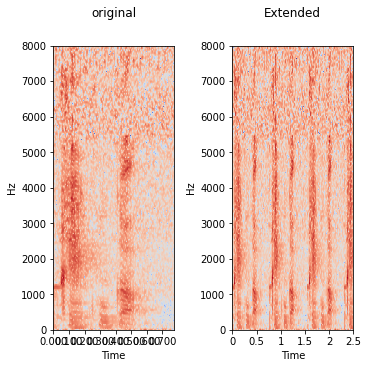

In [ ]:
fig, (ax1, ax2)  = plt.subplots(1, 2,figsize=(5,5),constrained_layout=True)
ax1.set_title("original", y=1.08)
a=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/origin_train/T_1002479.npy')
b=np.squeeze(a,axis=2).T
_ = librosa.display.specshow(b, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=ax1)
ax2.set_title("Extended", y=1.08)
c=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/train/T_1002479.npy')
d=np.squeeze(c,axis=2).T
_ = librosa.display.specshow(d, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=ax2)

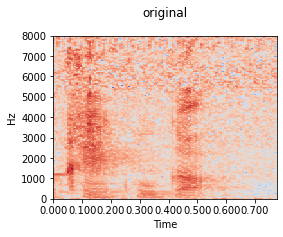

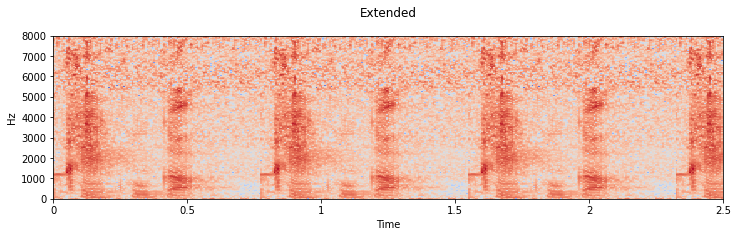

In [ ]:
fig1, ax1=plt.subplots(1,1,figsize=(4,3))
fig2, ax2=plt.subplots(1,1,figsize=(12,3))


ax1.set_title("original", y=1.08)
a=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/origin_train/T_1002479.npy')
b=np.squeeze(a,axis=2).T
_ = librosa.display.specshow(b, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=ax1)
ax2.set_title("Extended", y=1.08)
c=np.load('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/feature_keras_generator/train/T_1002479.npy')
d=np.squeeze(c,axis=2).T
_ = librosa.display.specshow(d, sr=16000,y_axis='linear', fmax=8000, x_axis='time',hop_length=100,ax=ax2)

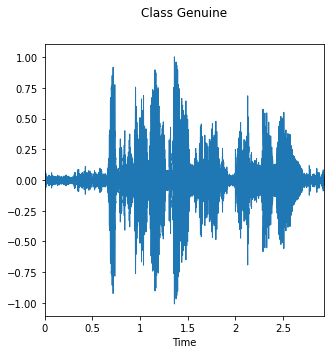

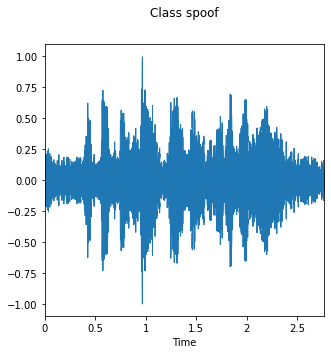

In [ ]:
fig1, ax1=plt.subplots(1,1,figsize=(5,5))
fig2, ax2=plt.subplots(1,1,figsize=(5,5))


ax1.set_title("Class Genuine", y=1.08)
data, sr = librosa.load(f"/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ASV_SPOOF/Asvspoof2017_v2/ASVspoof2017_V2/train/" + 'T_1000011.wav')
_ = librosa.display.waveplot(data, sr=sr, ax=ax1)
ax2.set_title("Class spoof", y=1.08)
data, sr = librosa.load(f"/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ASV_SPOOF/Asvspoof2017_v2/ASVspoof2017_V2/train/" + 'T_1001997.wav')
_ = librosa.display.waveplot(data, sr=sr, ax=ax2)

In [ ]:
def audio2frame(signal,frame_length,frame_step,winfunc=lambda x:numpy.ones((x,))):
    
    signal_length=len(signal)
    #print(signal_length) 
    frame_length=int(round(frame_length)) 
    #print(frame_length) 
    frame_step=int(round(frame_step))
    #print(frame_step)  
    if signal_length<=frame_length: 
        frames_num=1
    else: 
        frames_num=1+int(math.ceil((1.0*signal_length-frame_length)/frame_step))
    #print(frames_num)
    pad_length=int((frames_num-1)*frame_step+frame_length)
    #print(pad_length) 
    zeros=numpy.zeros((pad_length-signal_length,))
    #print(zeros) 
    pad_signal=numpy.concatenate((signal,zeros))
    #print(pad_signal.shape) 
    indices=numpy.tile(numpy.arange(0,frame_length),(frames_num,1))+numpy.tile(numpy.arange(0,frames_num*frame_step,frame_step),(frame_length,1)).T 
    #print(indices.shape) 
    indices=numpy.array(indices,dtype=numpy.int32)
    #print(indices) 
    frames=pad_signal[indices]
    #print(frames.shape) 
    win=numpy.tile(winfunc(frame_length),(frames_num,1))
    #print(win.shape)   
    return frames*win 

In [ ]:
a='/content/drive/MyDrive/asvspoof_2017_v2/dev/D_1000001.wav'
import scipy.io.wavfile as wav
rate,sig = wav.read(a)
sig.shape

(68664,)

In [ ]:
b=audio2frame(sig,512,256)


In [ ]:
b.shape

(268, 512)

In [ ]:
def deframesignal(frames,signal_length,frame_length,frame_step,winfunc=lambda x:numpy.ones((x,))):
    
    signal_length=round(signal_length) 
    frame_length=round(frame_length) 
    frames_num=numpy.shape(frames)[0] 
    assert numpy.shape(frames)[1]==frame_length
    indices=numpy.tile(numpy.arange(0,frame_length),(frames_num,1))+numpy.tile(numpy.arange(0,frames_num*frame_step,frame_step),(frame_length,1)).T  
    indices=numpy.array(indices,dtype=numpy.int32)
    pad_length=(frames_num-1)*frame_step+frame_length 
    if signal_length<=0:
        signal_length=pad_length
    recalc_signal=numpy.zeros((pad_length,)) 
    window_correction=numpy.zeros((pad_length,1)) 
    win=winfunc(frame_length)
    for i in range(0,frames_num):
        window_correction[indices[i,:]]=window_correction[indices[i,:]]+win+1e-15 
        recalc_signal[indices[i,:]]=recalc_signal[indices[i,:]]+frames[i,:]
    recalc_signal=recalc_signal/window_correction 
    return recalc_signal[0:signal_length] 

In [ ]:
def spectrum_magnitude(frames,NFFT):
    complex_spectrum=numpy.fft.rfft(frames,NFFT) 
    return numpy.absolute(complex_spectrum)

In [ ]:
from scipy.io import wavfile
from scipy.signal import stft, get_window
import numpy as np
import matplotlib.pyplot as plt
def group_delay(audio):
    rate, data = wavfile.read(audio)
    n_data = np.multiply(data, np.arange(len(data)))
    f, t, X = stft(data, rate, window="hamming", nperseg=800, return_onesided=False)
    f_n, t_n, Y = stft(n_data, rate, window="hamming", nperseg=800, return_onesided=False)
    group_delay = np.divide(np.multiply(X.real, Y.real) + np.multiply(Y.imag, X.imag), np.power(np.abs(X), 2))
    return group_delay

In [ ]:
def spectrum_power(frames,NFFT):
    return 1.0/NFFT * numpy.square(spectrum_magnitude(frames,NFFT))

In [ ]:
def log_spectrum_power(frames,NFFT,norm=1):
    spec_power=spectrum_power(frames,NFFT)
    spec_power[spec_power<1e-30]=1e-30 
    log_spec_power=10*numpy.log10(spec_power)
    if norm:
        return log_spec_power-numpy.max(log_spec_power)
    else:
        return log_spec_power

In [ ]:
c=log_spectrum_power(b,800)
c.shape

In [ ]:
c

array([[-42.34004954, -63.77278076, -37.00994528, ..., -85.82616316,
        -84.73915265, -84.58902571],
       [-73.14784332, -46.73987697, -44.41608694, ..., -84.33073304,
        -84.64521148, -94.87955913],
       [-59.51408126, -42.39860374, -53.06973576, ..., -84.69583395,
        -83.98435615, -88.65457591],
       ...,
       [-45.37951779, -43.38047566, -35.03463668, ..., -84.13939493,
        -83.16077681, -90.52570333],
       [-41.86354429, -45.37363761, -44.78166776, ..., -92.26540567,
        -95.54678235, -91.68554227],
       [-53.69562616, -48.08214559, -47.66934013, ..., -83.24021945,
        -89.7670054 , -80.70925268]])

In [ ]:
dim1,dim2 = c.shape

In [ ]:
dim1 / 864

0.3101851851851852

In [ ]:
def pre_emphasis(signal,coefficient=0.95):
    return numpy.append(signal[0],signal[1:]-coefficient*signal[:-1])

In [ ]:
def hz2mel(hz):
    return 2595*numpy.log10(1+hz/700.0)

In [ ]:
def mel2hz(mel):
    return 700*(10**(mel/2595.0)-1)

In [ ]:
try:
    xrange(1)
except:
    xrange=range

In [ ]:
def get_filter_banks(filters_num=20,NFFT=512,samplerate=16000,low_freq=0,high_freq=None):
    
  
    low_mel=hz2mel(low_freq)
    high_mel=hz2mel(high_freq)

    mel_points=numpy.linspace(low_mel,high_mel,filters_num+2)

    hz_points=mel2hz(mel_points)

    bin=numpy.floor((NFFT+1)*hz_points/samplerate)
  
    fbank=numpy.zeros([filters_num,NFFT/2+1])
    for j in xrange(0,filters_num):
        for i in xrange(int(bin[j]),int(bin[j+1])):
            fbank[j,i]=(i-bin[j])/(bin[j+1]-bin[j])
        for i in xrange(int(bin[j+1]),int(bin[j+2])):
            fbank[j,i]=(bin[j+2]-i)/(bin[j+2]-bin[j+1])
    return fbank

In [ ]:
def fbank(signal,samplerate=16000,win_length=0.025,win_step=0.01,filters_num=26,NFFT=512,low_freq=0,high_freq=None,pre_emphasis_coeff=0.97):

    high_freq=high_freq or samplerate/2  
    signal=pre_emphasis(signal,pre_emphasis_coeff)  
    frames=audio2frame(signal,win_length*samplerate,win_step*samplerate)
    spec_power=spectrum_power(frames,NFFT)  
    energy=numpy.sum(spec_power,1) 
    energy=numpy.where(energy==0,numpy.finfo(float).eps,energy)  
    fb=get_filter_banks(filters_num,NFFT,samplerate,low_freq,high_freq) 
    
    spec_power=numpy.fliplr(spec_power)
    
    feat=numpy.dot(spec_power,fb.T)  
    feat=numpy.where(feat==0,numpy.finfo(float).eps,feat)  
    return feat,energy

In [ ]:
def log_fbank(signal,samplerate=16000,win_length=0.025,win_step=0.01,filters_num=26,NFFT=512,low_freq=0,high_freq=None,pre_emphasis_coeff=0.97):
   
    feat,energy=fbank(signal,samplerate,win_length,win_step,filters_num,NFFT,low_freq,high_freq,pre_emphasis_coeff)
    return numpy.log(feat)

In [ ]:
def lifter(cepstra,L=22):
    
    if L>0:
        nframes,ncoeff=numpy.shape(cepstra)
        n=numpy.arange(ncoeff)
        lift=1+(L/2)*numpy.sin(numpy.pi*n/L)
        return lift*cepstra
    else:
        return cepstra

In [ ]:
def calcMFCC(signal,samplerate=16000,win_length=0.025,win_step=0.01,cep_num=13,filters_num=26,NFFT=512,low_freq=0,high_freq=None,pre_emphasis_coeff=0.97,cep_lifter=22,appendEnergy=True):

    
    feat,energy=fbank(signal,samplerate,win_length,win_step,filters_num,NFFT,low_freq,high_freq,pre_emphasis_coeff)
    feat=numpy.log(feat)
    feat=dct(feat,type=2,axis=1,norm='ortho')[:,:cep_num]  
    feat=lifter(feat,cep_lifter)
    if appendEnergy:
        feat[:,0]=numpy.log(energy)  
    return feat

In [ ]:
def derivate(feat,big_theta=2,cep_num=13):
    
    result=numpy.zeros(feat.shape) 
    denominator=0  
    for theta in numpy.linspace(1,big_theta,big_theta):
        denominator=denominator+theta**2
    denominator=denominator*2 
    for row in numpy.linspace(0,feat.shape[0]-1,feat.shape[0]):
        tmp=numpy.zeros((cep_num,))
        numerator=numpy.zeros((cep_num,)) 
        for t in numpy.linspace(1,cep_num,cep_num):
            a=0
            b=0
            s=0
            for theta in numpy.linspace(1,big_theta,big_theta):
                if (t+theta)>cep_num:
                    a=0
                else:
                    a=feat[int(row)][int(t+theta-1)]
                if (t-theta)<1:
                    b=0
                else:
                    b=feat[int(row)][int(t-theta-1)]
                s+=theta*(a-b)
            numerator[int(t)-1]=s
        tmp=numerator*1.0/denominator
        result[int(row)]=tmp
    return result

In [ ]:
def calcMFCC_delta(signal,samplerate=16000,win_length=0.025,win_step=0.01,cep_num=13,filters_num=26,NFFT=512,low_freq=0,high_freq=None,pre_emphasis_coeff=0.97,cep_lifter=22,appendEnergy=True):

    feat=calcMFCC(signal,samplerate,win_length,win_step,cep_num,filters_num,NFFT,low_freq,high_freq,pre_emphasis_coeff,cep_lifter,appendEnergy)   
    result=derivate(feat,cep_num=cep_num) 
    result=numpy.concatenate((feat,result),axis=1)
    return result 

In [ ]:
def calcMFCC_delta_delta(signal,samplerate=16000,win_length=0.025,win_step=0.01,cep_num=13,filters_num=26,NFFT=512,low_freq=0,high_freq=None,pre_emphasis_coeff=0.97,cep_lifter=22,appendEnergy=True):
  
    feat=calcMFCC(signal,samplerate,win_length,win_step,cep_num,filters_num,NFFT,low_freq,high_freq,pre_emphasis_coeff,cep_lifter,appendEnergy)   
    result1=derivate(feat,cep_num = cep_num)
    result2=derivate(result1,cep_num=cep_num)
    result3=numpy.concatenate((feat,result1),axis=1)
    result=numpy.concatenate((result3,result2),axis=1)
    return result

In [ ]:
wav_path = '/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ASV_SPOOF/Asvspoof2017_v2/ASVspoof2017_V2/'
proctol_path ='/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/ASV_SPOOF/Asvspoof2017_v2/protocol_V2/protocol_V2/'

In [ ]:
def get_wav_files(wav_path,proctol_path,dataSet):
    wav_path = wav_path + dataSet
    X = []
    Y = []
    label_map = {'genuine':1,'spoof':0}
    label_file = proctol_path + dataSet +'.trl.txt'

    with open(label_file,'rb+') as file:
        for line in file.readlines():
            tmp = line.split()
            decoder = np.vectorize(lambda x: x.decode('UTF-8'))
            tmp=decoder(tmp)
            Y.append(label_map[tmp[1]])
            filename_path = os.sep.join([wav_path,tmp[0]])
            X.append(filename_path)
    return X,Y

In [ ]:
get_wav_files(wav_path,proctol_path,'train')[0][1509]

'/content/drive/MyDrive/asvspoof_2017_v2/train/T_1001511.wav'

In [ ]:
all=get_wav_files(wav_path,proctol_path,'train')

In [ ]:
(a,b) = wav.read('/content/drive/MyDrive/asvspoof_2017_v2/T/T_1000001.wav')

In [ ]:
len(b)

38744

In [ ]:
2.5*16000

40000.0

In [ ]:
num_missing_samples = int(2.51875*16000) - len(b)
si=np.pad(b,(0, num_missing_samples),mode='constant')
si = pre_emphasis(si)
frames = audio2frame(si,400,100,np.blackman)#blackman window alpha=0.16
log = log_spectrum_power(frames,800,norm=1)[:,:-1]
log.shape

(400, 400)

In [ ]:
f = audio2frame(b,400,100,np.blackman)

In [ ]:
logPowSpec = log_spectrum_power(f,800,norm=1)[:,:-1]

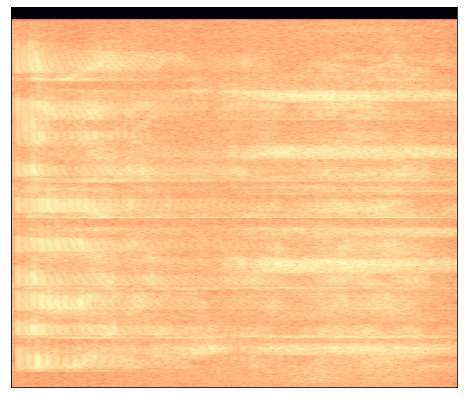

In [ ]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 7))
librosa.display.specshow(log, sr=16000)
plt.show()

In [ ]:
dim1,dim2 = logPowSpec.shape

In [ ]:
1210 // 385

3

In [ ]:
mod = 1210 % 385

In [ ]:
diff=1210-385

In [ ]:
logPowSpec.shape

(385, 400)

In [ ]:
np.array([[1, 2], [3, 4]]).shape

(2, 2)

In [ ]:
an_array.shape

(385, 400)

In [ ]:
np.pad(y, (0, conf.samples - len(y) - diff), 'constant')

In [ ]:
np.zeros((diff, dim2)).shape

(825, 400)

In [ ]:
np.pad(logPowSpec,diff,mode='constant').shape

(2035, 2050)

In [ ]:
np.array([logPowSpec]*3).shape

(3, 385, 400)

In [ ]:
np.array([logPowSpec]*3).reshape((3*dim1,dim2))

array([[-59.29287392, -62.49895581, -67.9805176 , ..., -95.96080733,
        -93.7302321 , -96.54764463],
       [-57.63682452, -57.53599145, -56.19372233, ..., -89.43465788,
        -88.84969138, -88.13023388],
       [-58.3699544 , -59.3274918 , -58.95982876, ..., -97.63522433,
        -96.08009259, -92.19789311],
       ...,
       [-58.26309739, -57.66361103, -56.53495326, ..., -80.29164823,
        -80.41413106, -83.64942562],
       [-68.38678215, -69.56108774, -65.67446244, ..., -83.84621964,
        -80.3574157 , -78.27343769],
       [-53.47755925, -53.26529387, -52.70041655, ..., -87.16759142,
        -83.53878232, -81.71243394]])

In [ ]:
logPowSpec

array([[-54.5992922 , -55.2000743 , -59.27552255, ..., -86.85554566,
        -86.97738043, -87.70222578],
       [-74.89248262, -64.70131125, -56.02206547, ..., -96.3297917 ,
        -96.16323806, -99.56643349],
       [-52.84434002, -51.47819076, -49.034865  , ..., -95.27084596,
        -97.68953192, -93.65938556],
       ...,
       [-75.47652133, -60.31128545, -51.53542461, ..., -87.09604118,
        -84.93981372, -79.91350057],
       [-50.42608163, -50.47746617, -51.6277199 , ..., -82.25628691,
        -82.23025116, -80.91464841],
       [-53.0571077 , -52.56417208, -51.99092999, ..., -87.16736322,
        -86.69258204, -86.62841244]])

In [ ]:
logPowSpec[0:mod,:]

array([[-59.29287392, -62.49895581, -67.9805176 , ..., -95.96080733,
        -93.7302321 , -96.54764463],
       [-57.63682452, -57.53599145, -56.19372233, ..., -89.43465788,
        -88.84969138, -88.13023388],
       [-58.3699544 , -59.3274918 , -58.95982876, ..., -97.63522433,
        -96.08009259, -92.19789311],
       ...,
       [-59.94285432, -53.99102485, -50.10922347, ..., -60.17704816,
        -60.04229589, -60.18489225],
       [-70.23220174, -52.69525643, -49.61084264, ..., -61.46943828,
        -61.88455653, -62.88310177],
       [-44.89597812, -44.75946265, -42.87800827, ..., -77.27403707,
        -76.55776133, -76.45556201]])

In [ ]:
logPowSpec[0:mod,:].shape

(55, 400)

In [ ]:
d=np.concatenate((np.array([logPowSpec]*3).reshape((3*dim1,dim2)),logPowSpec[0:mod,:]))
d.shape

(1210, 400)

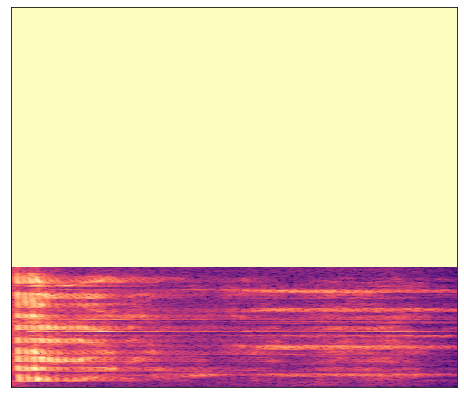

In [ ]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 7))
librosa.display.specshow(padded_array, sr=16000)
plt.show()

In [ ]:
603//400

1

In [ ]:
logPowSpec

array([[-59.29287392, -62.49895581, -67.9805176 , ..., -95.96080733,
        -93.7302321 , -96.54764463],
       [-57.63682452, -57.53599145, -56.19372233, ..., -89.43465788,
        -88.84969138, -88.13023388],
       [-58.3699544 , -59.3274918 , -58.95982876, ..., -97.63522433,
        -96.08009259, -92.19789311],
       ...,
       [-58.26309739, -57.66361103, -56.53495326, ..., -80.29164823,
        -80.41413106, -83.64942562],
       [-68.38678215, -69.56108774, -65.67446244, ..., -83.84621964,
        -80.3574157 , -78.27343769],
       [-53.47755925, -53.26529387, -52.70041655, ..., -87.16759142,
        -83.53878232, -81.71243394]])

In [ ]:
logPowSpec[0:6*100,:]

array([[-59.29287392, -62.49895581, -67.9805176 , ..., -95.96080733,
        -93.7302321 , -96.54764463],
       [-57.63682452, -57.53599145, -56.19372233, ..., -89.43465788,
        -88.84969138, -88.13023388],
       [-58.3699544 , -59.3274918 , -58.95982876, ..., -97.63522433,
        -96.08009259, -92.19789311],
       ...,
       [-58.26309739, -57.66361103, -56.53495326, ..., -80.29164823,
        -80.41413106, -83.64942562],
       [-68.38678215, -69.56108774, -65.67446244, ..., -83.84621964,
        -80.3574157 , -78.27343769],
       [-53.47755925, -53.26529387, -52.70041655, ..., -87.16759142,
        -83.53878232, -81.71243394]])

In [ ]:
logPowSpec[-300:,:]

array([[-44.94724347, -45.33545541, -42.99187405, ..., -77.81255664,
        -74.97383434, -73.82025608],
       [-53.94058714, -45.78934078, -41.66613571, ..., -72.36191445,
        -74.57409642, -79.73212857],
       [-45.57323837, -43.39327934, -40.99725462, ..., -78.79303293,
        -79.22067014, -79.96180624],
       ...,
       [-58.26309739, -57.66361103, -56.53495326, ..., -80.29164823,
        -80.41413106, -83.64942562],
       [-68.38678215, -69.56108774, -65.67446244, ..., -83.84621964,
        -80.3574157 , -78.27343769],
       [-53.47755925, -53.26529387, -52.70041655, ..., -87.16759142,
        -83.53878232, -81.71243394]])

In [ ]:
d=logPowSpec[0:100,:]

In [ ]:
z=logPowSpec[-100:,:]

In [ ]:
e=np.concatenate((z,d))

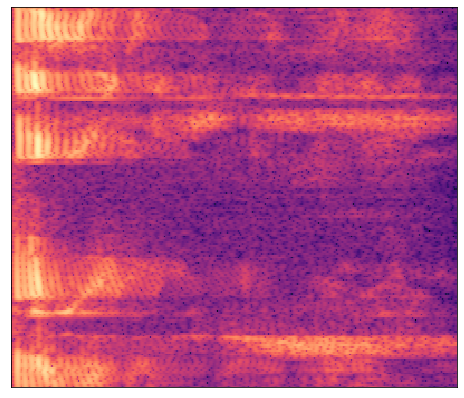

In [ ]:
import librosa, librosa.display
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 7))
librosa.display.specshow(e, sr=16000)
plt.show()

In [ ]:
(logPowSpec[0:3*100,:].reshape(3,100,-1)).shape

(3, 100, 400)

In [ ]:
def getDataSet1(wav_files,label,img_rows=512,FrameLen=256,FrameInc=64,NFFT=800,winfunc=lambda x:np.ones((x,))):
    X = []
    Y = []
    for i,singleWav in enumerate(wav_files):
        (rate,sig) = wav.read(singleWav)
        frames = audio2frame(sig,FrameLen,FrameInc,winfunc)#blackman window alpha=0.16
        logPowSpec = log_spectrum_power(frames,NFFT,norm=1)[:,:-1]
        #print('0:',logPowSpec.shape)
        #logPowSpec = spectrum_power(frames,NFFT)
        #logPowSpec = log_fbank(sig,win_length=0.025,win_step=0.01,filters_num=39,NFFT)
        #logPowSpec = calcMFCC_delta_delta(sig,win_length=0.025,win_step=0.01,cep_num=20,filters_num=26,NFFT)
        dim1,dim2 = logPowSpec.shape
        if dim1 >= img_rows :
            divNum = dim1 // img_rows
            #print('1:',divNum)
            logPowSpec = logPowSpec[0:divNum*img_rows,:]
            #print('2:',logPowSpec.shape)
            logPowSpec = logPowSpec.reshape(divNum,img_rows,-1)
            #print('3:',logPowSpec.shape)
            X.extend(logPowSpec)
            #print('4:',logPowSpec.shape)
            Y.extend([label[i]]*divNum)
            #print('5:'[label[i]]*divNum)
        else :
            divNum = img_rows // dim1
            #print('6:',divNum)
            mod = img_rows % dim1
            #print('7:',mod)
            logPowSpec =  np.array([logPowSpec]*divNum).reshape((divNum*dim1,dim2))
            #print('8:',logPowSpec.shape)
            logPowSpec =  np.concatenate((logPowSpec,logPowSpec[0:mod,:]))
            #print('9:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('10:',logPowSpec.shape)
            Y.append(label[i])
            #print('11:'[label[i]]*divNum)
    return X,Y

In [ ]:
def getDataSet2(wav_files,label,img_rows=200,FrameLen=400,FrameInc=100,NFFT=400,winfunc=lambda x:np.ones((x,))):
    X = []
    Y = []
    for i,singleWav in enumerate(wav_files):
        (rate,sig) = wav.read(singleWav)
        sig = pre_emphasis(sig)
        frames = audio2frame(sig,FrameLen,FrameInc,winfunc)#blackman window alpha=0.16
        logPowSpec = log_spectrum_power(frames,NFFT,norm=1)[:,:-1]
        #print('0:',logPowSpec.shape)
        #logPowSpec = spectrum_power(frames,NFFT)
        #logPowSpec = log_fbank(sig,win_length=0.025,win_step=0.01,filters_num=39,NFFT)
        #logPowSpec = calcMFCC_delta_delta(sig,win_length=0.025,win_step=0.01,cep_num=20,filters_num=26,NFFT)
        dim1,dim2 = logPowSpec.shape
        if dim1 >= img_rows :
            #divNum = dim1 // img_rows
            #print('1:',divNum)
            logPowSpec = logPowSpec[0:img_rows,:]
            #print('2:',logPowSpec.shape)
            #logPowSpec = logPowSpec.reshape(divNum,img_rows,-1)
            #print('3:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('4:',logPowSpec.shape)
            Y.append(label[i])
            #print('5:'[label[i]]*divNum)
        else :
            divNum = img_rows // dim1
            #print('6:',divNum)
            mod = img_rows % dim1
            #print('7:',mod)
            logPowSpec =  np.array([logPowSpec]*divNum).reshape((divNum*dim1,dim2))
            #print('8:',logPowSpec.shape)
            logPowSpec =  np.concatenate((logPowSpec,logPowSpec[0:mod,:]))
            #print('9:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('10:',logPowSpec.shape)
            Y.append(label[i])
            #print('11:'[label[i]]*divNum)
    return X,Y

In [ ]:
def getDataSet3(wav_files,label,img_rows=200,FrameLen=400,FrameInc=100,NFFT=400,winfunc=lambda x:np.ones((x,))):
    X = []
    Y = []
    for i,singleWav in enumerate(wav_files):
        (rate,sig) = wav.read(singleWav)
        signal = pre_emphasis(sig)
        sig = pre_emphasis(sig)
        frames = audio2frame(sig,FrameLen,FrameInc,winfunc)#blackman window alpha=0.16
        logPowSpec = log_spectrum_power(frames,NFFT,norm=1)[:,:-1]
        #print('0:',logPowSpec.shape)
        #logPowSpec = spectrum_power(frames,NFFT)
        #logPowSpec = log_fbank(sig,win_length=0.025,win_step=0.01,filters_num=39,NFFT)
        #logPowSpec = calcMFCC_delta_delta(sig,win_length=0.025,win_step=0.01,cep_num=20,filters_num=26,NFFT)
        dim1,dim2 = logPowSpec.shape
        if dim1 >= img_rows :
            #divNum = dim1 // img_rows
            #print('1:',divNum)
            logPowSpec = logPowSpec[-img_rows:,:]
            #print('2:',logPowSpec.shape)
            #logPowSpec = logPowSpec.reshape(divNum,img_rows,-1)
            #print('3:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('4:',logPowSpec.shape)
            Y.append(label[i])
            #print('5:'[label[i]]*divNum)
        else :
            divNum = img_rows // dim1
            #print('6:',divNum)
            mod = img_rows % dim1
            #print('7:',mod)
            logPowSpec =  np.array([logPowSpec]*divNum).reshape((divNum*dim1,dim2))
            #print('8:',logPowSpec.shape)
            logPowSpec =  np.concatenate((logPowSpec,logPowSpec[0:mod,:]))
            #print('9:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('10:',logPowSpec.shape)
            Y.append(label[i])
            #print('11:'[label[i]]*divNum)
    return X,Y

In [ ]:
import librosa
from librosa.feature import melspectrogram
def get_log_mel_spec(wav_files,label,img_rows=200,nmel=128,hop=320,NFFT=2048):
    X = []
    Y = []
    for i,singleWav in enumerate(wav_files):
        (rate,sig) = wav.read(singleWav)
        signal = pre_emphasis(sig)
        mel_spec= melspectrogram(signal,16000,n_mels=nmel,n_fft=NFFT,hop_length=hop)[:,:]#[n_mels, len(audio_data)//hop_length +1]
        mel_spec = np.transpose(mel_spec, (1, 0))
        log_mel_spec=librosa.power_to_db(mel_spec, ref=np.max)
        #print('file:',file)
        #print('0:',logPowSpec.shape)
        #logPowSpec = spectrum_power(frames,NFFT)
        #logPowSpec = log_fbank(sig,win_length=0.025,win_step=0.01,filters_num=39,NFFT)
        #logPowSpec = calcMFCC_delta_delta(sig,win_length=0.025,win_step=0.01,cep_num=20,filters_num=26,NFFT)
        dim1,dim2 = log_mel_spec.shape
        if dim1 >= img_rows :
            #divNum = dim1 // img_rows
            #print('1:',divNum)
            log_mel_spec = log_mel_spec[0:img_rows,:]
            log_mel_spec = np.transpose(log_mel_spec, (1, 0))
            #print('2:',logPowSpec.shape)
            #logPowSpec = logPowSpec.reshape(divNum,img_rows,-1)
            #print('3:',logPowSpec.shape)
            X.append(log_mel_spec)
            #print('4:',logPowSpec.shape)
            Y.append(label[i])
            #print('5:'[label[i]]*divNum)
        else :
            divNum = img_rows // dim1
            #print('6:',divNum)
            mod = img_rows % dim1
            #print('7:',mod)
            log_mel_spec =  np.array([log_mel_spec]*divNum).reshape((divNum*dim1,dim2))
            #print('8:',logPowSpec.shape)
            log_mel_spec =  np.concatenate((log_mel_spec,log_mel_spec[0:mod,:]))
            log_mel_spec = np.transpose(log_mel_spec, (1, 0))
            #print('9:',logPowSpec.shape)
            X.append(log_mel_spec)
            #print('10:',logPowSpec.shape)
            Y.append(label[i])
            #print('11:'[label[i]]*divNum)
    return X,Y

In [ ]:
def getDataSet4(wav_files,label,img_rows=200,FrameLen=400,FrameInc=100,NFFT=400,winfunc=lambda x:np.ones((x,))):
    X = []
    Y = []
    for i,singleWav in enumerate(wav_files):
        (rate,sig) = wav.read(singleWav)
        signal = pre_emphasis(sig)
        sig = pre_emphasis(sig)
        frames = audio2frame(sig,FrameLen,FrameInc,winfunc)#blackman window alpha=0.16
        logPowSpec = log_spectrum_power(frames,NFFT,norm=1)[:,:-1]
        #print('0:',logPowSpec.shape)
        #logPowSpec = spectrum_power(frames,NFFT)
        #logPowSpec = log_fbank(sig,win_length=0.025,win_step=0.01,filters_num=39,NFFT)
        #logPowSpec = calcMFCC_delta_delta(sig,win_length=0.025,win_step=0.01,cep_num=20,filters_num=26,NFFT)
        dim1,dim2 = logPowSpec.shape
        if dim1 >= img_rows :
            #divNum = dim1 // img_rows
            #print('1:',divNum)
            logPowSpec = np.concatenate((logPowSpec[0:(img_rows//2),:],logPowSpec[-(img_rows//2):,:]))
            #print('2:',logPowSpec.shape)
            #logPowSpec = logPowSpec.reshape(divNum,img_rows,-1)
            #print('3:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('4:',logPowSpec.shape)
            Y.append(label[i])
            #print('5:'[label[i]]*divNum)
        else :
            divNum = img_rows // dim1
            #print('6:',divNum)
            mod = img_rows % dim1
            #print('7:',mod)
            logPowSpec =  np.array([logPowSpec]*divNum).reshape((divNum*dim1,dim2))
            #print('8:',logPowSpec.shape)
            logPowSpec =  np.concatenate((logPowSpec,logPowSpec[0:mod,:]))
            #print('9:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('10:',logPowSpec.shape)
            Y.append(label[i])
            #print('11:'[label[i]]*divNum)
    return X,Y

In [ ]:
def getDataSet5(wav_files,label,img_rows=400,FrameLen=400,FrameInc=100,NFFT=800,winfunc=lambda x:np.ones((x,))):
    X = []
    Y = []
    for i,singleWav in enumerate(wav_files):
        (rate,sig) = wav.read(singleWav)
        length=len(sig)
        signal = pre_emphasis(sig)
        frames = audio2frame(signal,FrameLen,FrameInc,winfunc)#blackman window alpha=0.16
        logPowSpec = log_spectrum_power(frames,NFFT,norm=1)[:,:-1]
        #print('0:',logPowSpec.shape)
        #logPowSpec = spectrum_power(frames,NFFT)
        #logPowSpec = log_fbank(sig,win_length=0.025,win_step=0.01,filters_num=39,NFFT)
        #logPowSpec = calcMFCC_delta_delta(sig,win_length=0.025,win_step=0.01,cep_num=20,filters_num=26,NFFT)
        dim1,dim2 = logPowSpec.shape
        if dim1 >= img_rows :
             #divNum = dim1 // img_rows
            #print('1:',divNum)
            logPowSpec = logPowSpec[0:img_rows,:]
            #print('2:',logPowSpec.shape)
            #logPowSpec = logPowSpec.reshape(divNum,img_rows,-1)
            #print('3:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('4:',logPowSpec.shape)
            Y.append(label[i])
            #print('5:'[label[i]]*divNum)
        else :
            
            num_missing_samples = int(2.51875*16000) - length
            sig=np.pad(sig,(0, num_missing_samples),mode='constant')
            sig = pre_emphasis(sig)
            frames = audio2frame(sig,400,100,np.blackman)#blackman window alpha=0.16
            logPowSpec = log_spectrum_power(frames,800,norm=1)[:,:-1]
            #print('6:',divNum)
            X.append(logPowSpec)
            #print('10:',logPowSpec.shape)
            Y.append(label[i])
            #print('11:'[label[i]]*divNum)
    return X,Y

In [ ]:
def getDataSet6(wav_files,label,img_rows=100,FrameLen=100,FrameInc=16,NFFT=200,winfunc=lambda x:np.ones((x,))):
    X = []
    Y = []
    for i,singleWav in enumerate(wav_files):
        (rate,sig) = wav.read(singleWav)
        frames = audio2frame(sig,FrameLen,FrameInc,winfunc)#blackman window alpha=0.16
        logPowSpec = log_spectrum_power(frames,NFFT,norm=1)[:,:-1]
        
        #print('0:',logPowSpec.shape)
        #logPowSpec = spectrum_power(frames,NFFT)
        #logPowSpec = log_fbank(sig,win_length=0.025,win_step=0.01,filters_num=39,NFFT)
        #logPowSpec = calcMFCC_delta_delta(sig,win_length=0.025,win_step=0.01,cep_num=20,filters_num=26,NFFT)
        dim1,dim2 = logPowSpec.shape
        if dim1 >= img_rows :
            #divNum = dim1 // img_rows
            #print('1:',divNum)
            logPowSpec = logPowSpec[0:img_rows,:]
            #print('2:',logPowSpec.shape)
            #logPowSpec = logPowSpec.reshape(divNum,img_rows,-1)
            #print('3:',logPowSpec.shape)
            X.append(logPowSpec)
            #print('4:',logPowSpec.shape)
            Y.append([label[i]])
            #print('5:'[label[i]]*divNum)
        else :
            nb_dup = int(img_rows/ dim1) + 1
            logPowSpec = np.tile(logPowSpec,(nb_dup))[:img_rows,:]
            X.append(logPowSpec)
            #print('10:',logPowSpec.shape)
            Y.append(label[i])
            #print('11:'[label[i]]*divNum)
    return X,Y

In [ ]:
getDataSet5(all[0],all[1])

In [ ]:
def DataProcess(dataset,img_rows=256,FrameLen=256,FrameInc=64,NFFT=800,winfunc=lambda x:np.ones((x,))):
    wav_files,label = get_wav_files(wav_path,proctol_path,dataset)
    X,label = getDataSet1(wav_files,label,img_rows,FrameLen,FrameInc,NFFT,winfunc)
    X = [ (i - np.mean(i,axis=0,dtype=float))/np.std(i,axis=0,dtype=float) for i in X ]#X = [ StandardScaler().fit_transform(i) for i in X ]
    dim = [i.shape[0] for i in X]
    return X,label,dim

In [ ]:
def DataProcess2(dataset,img_rows=256,FrameLen=256,FrameInc=64,NFFT=800,winfunc=lambda x:np.ones((x,))):
    wav_files,label = get_wav_files(wav_path,proctol_path,dataset)
    X,label = getDataSet2(wav_files,label,img_rows,FrameLen,FrameInc,NFFT,winfunc)
    X = [ ((i -i.min())/(i.max()-i.min())) for i in X ]#X = [ StandardScaler().fit_transform(i) for i in X ]
    dim = [i.shape[0] for i in X]
    return X,label,dim

In [ ]:
def DataProcess3(dataset,img_rows=256,FrameLen=256,FrameInc=64,NFFT=800,winfunc=lambda x:np.ones((x,))):
    wav_files,label = get_wav_files(wav_path,proctol_path,dataset)
    X,label = getDataSet2(wav_files,label,img_rows,FrameLen,FrameInc,NFFT,winfunc)
    #X = [ (i - np.min(i))/(np.max(i)-np.min(i)) for i in X ]#X = [ StandardScaler().fit_transform(i) for i in X ]
    dim = [i.shape[0] for i in X]
    return X,label,dim

#log_mel_spectrogram

In [ ]:
def DataProcess(dataset,img_rows=500,nmel=40,hop=320,NFFT=2048):
    wav_files,label = get_wav_files(wav_path,proctol_path,dataset)
    X,label = get_log_mel_spec(wav_files,label,img_rows,nmel,hop,NFFT)
    X = [ (i - np.mean(i,axis=0,dtype=float))/np.std(i,axis=0,dtype=float) for i in X ]#X = [ StandardScaler().fit_transform(i) for i in X ]
    dim = [i.shape[0] for i in X]
    return X,label,dim

In [ ]:
def getData(img_rows=896,FrameLen=256,FrameInc=64,NFFT=800,winfunc=lambda x:np.ones((x,))):
    print ("Extract Feature from TrainSet:")
    trainData,trainLabel,dim_T = DataProcess('train',img_rows,FrameLen,FrameInc,NFFT,winfunc)
    print ("Ending from TrainSet")
    print ("Extraxt Feature from DevSet")
    devData,devLabel,dim_D = DataProcess('dev',img_rows,FrameLen,FrameInc,NFFT,winfunc)
    print ("Ending from DevSet")
    print ("Extract Feature from TestSet")
    evalData,evalLabel,dim_E = DataProcess('eval',img_rows,FrameLen,FrameInc,NFFT,winfunc)
    print ("Ending from TestSet")
    np.save('/content/drive/MyDrive/log_power_specturm/train',np.array(trainData))
    np.save('/content/drive/MyDrive/log_power_specturm/dev',np.array(devData))
    np.save('/content/drive/MyDrive/log_power_specturm/eval',np.array(evalData))
    np.save('/content/drive/MyDrive/log_power_specturm/train_label',np.array(trainLabel))
    np.save('/content/drive/MyDrive/log_power_specturm/dev_label',np.array(devLabel))
    np.save('/content/drive/MyDrive/log_power_specturm/eval_label',np.array(evalLabel))

In [ ]:
print ("Extract Feature from TrainSet:")
trainData,trainLabel,dim_T = DataProcess('train',img_rows=896,FrameLen=400,FrameInc=100,NFFT=514,winfunc=np.blackman)
print ("Ending from TrainSet")

Extract Feature from TrainSet:
Ending from TrainSet


In [ ]:
np.array(devData).shape

(1710, 400, 400)

In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/896-257/train/train',np.array(trainData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/896-257/train_lable/train_lable',np.array(trainLabel))

In [ ]:
del trainData,trainLabel
import gc
gc.collect()

219

In [ ]:
print ("Extraxt Feature from DevSet")
devData,devLabel,dim_D = DataProcess('dev',img_rows=896,FrameLen=400,FrameInc=100,NFFT=514,winfunc=np.blackman)
print ("Ending from DevSet")

Extraxt Feature from DevSet
Ending from DevSet


In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/896-257/dev/dev',np.array(devData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/896-257/dev_lable/dev_lable',np.array(devLabel))

In [ ]:
path, dirs, files = next(os.walk("/content/drive/MyDrive/asvspoof_2017_v2/eval_1"))
file_count = len(files)
print(file_count)

2877


In [ ]:
print ("Extract Feature from TestSet")
evalData,evalLabel,dim_E = DataProcess('eval_1',img_rows=400,FrameLen=400,FrameInc=100,NFFT=800,winfunc=np.blackman)
print ("Ending from TestSet")

Extract Feature from TestSet
Ending from TestSet


In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval/eval_1',np.array(evalData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval_lable/eval_1_label',np.array(evalLabel))

In [ ]:
print ("Extract Feature from TestSet")
evalData,evalLabel,dim_E = DataProcess('eval_2',img_rows=400,FrameLen=400,FrameInc=100,NFFT=800,winfunc=np.blackman)
print ("Ending from TestSet")

Extract Feature from TestSet
Ending from TestSet


In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval/eval_2',np.array(evalData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval_lable/eval_2_label',np.array(evalLabel))

In [ ]:
print ("Extract Feature from TestSet")
evalData,evalLabel,dim_E = DataProcess('eval_3',img_rows=400,FrameLen=400,FrameInc=100,NFFT=800,winfunc=np.blackman)
print ("Ending from TestSet")

Extract Feature from TestSet
Ending from TestSet


In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval/eval_3',np.array(evalData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval_lable/eval_3_label',np.array(evalLabel))

In [ ]:
del evalData,evalLabel,dim_E
import gc
gc.collect()

255

In [ ]:
print ("Extract Feature from TestSet")
evalData,evalLabel,dim_E = DataProcess('eval_4',img_rows=400,FrameLen=400,FrameInc=100,NFFT=800,winfunc=np.blackman)
print ("Ending from TestSet")

Extract Feature from TestSet
Ending from TestSet


In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval/eval_4',np.array(evalData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_power_spectrogram/log_power_spec_400_400_100_800/eval_lable/eval_4_label',np.array(evalLabel))

In [ ]:
print ("Extract Feature from TestSet")
evalData,evalLabel,dim_E = DataProcess('eval',img_rows=400,FrameLen=400,FrameInc=100,NFFT=800,winfunc=np.blackman)
print ("Ending from TestSet")

Extract Feature from TestSet


In [ ]:
del evalData,evalLabel
import gc
gc.collect()

#log_mel_spec

In [ ]:
print ("Extract Feature from TrainSet:")
trainData,trainLabel,dim_T = DataProcess2('train',img_rows=500,nmel=40,hop=320,NFFT=2048)
print ("Ending from TrainSet")

Extract Feature from TrainSet:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Ending from TrainSet


In [ ]:
np.array(devData).shape

(1710, 40, 500)

In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_mel_spectrogram/log_mel_500_40_320_2048/train/train',np.array(trainData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_mel_spectrogram/log_mel_500_40_320_2048/train_lable/train_lable',np.array(trainLabel))

In [ ]:
print ("Extraxt Feature from DevSet")
devData,devLabel,dim_D = DataProcess2('dev',img_rows=500,nmel=40,hop=320,NFFT=2048)
print ("Ending from DevSet")

Extraxt Feature from DevSet


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


Ending from DevSet


In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_mel_spectrogram/log_mel_500_40_320_2048/dev/dev',np.array(devData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_mel_spectrogram/log_mel_500_40_320_2048/dev_lable/dev_lable',np.array(devLabel))

In [ ]:
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_mel_spectrogram/log_mel_500_40_320_2048/eval_1/eval_1',np.array(evalData))
np.save('/content/drive/Shareddrives/Unlimited Drive | @LicenseMarket/log_mel_spectrogram/log_mel_500_40_320_2048/eval_1_label',np.array(evalLabel))